<a href="https://colab.research.google.com/github/adi1102/LearnGit/blob/master/assignment_svm_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification with SVM
### Linearly separable, Hard Margin

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import cvxpy as cp 
from sklearn import datasets

In this assignment you will implement SVM optimization task and solve it with CVXPY.

The decision function will be calculated and tested.

# Dataset
Import the Iris dataset.

The Iris dataset contains 3 classes of different Iris species with 50 samples each. 
The class Setosa is linearly separable from the other two classes Versicolor and Virginica. 
Each sample has four features sepal length, sepal width, petal length and petal width. 


#### 1. Select only the first two features sepal length and sepal width.
#### 2. Select the first 100 rows corresponding to the classes Setosa and Versicolor
#### 3. Change the values stored in iris.target to $-1$ and $1$.

In [2]:
iris = datasets.load_iris()

## Your code here
# Select the first two features and store them in the variable X. Store the target values in the variable y. 
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

# Select the first 100 rows of X and y. 
X = X[:100]
y =  y[:100]

# Change the target values stored in y to -1 and 1.
y = [-1 if x == 0 else 1 for x in y]

####  4. Convert y to column vector
To that point y is a numpy $1D$ -array of length $100$. 

We need a transposed version of it, namely a column vector with $100$ entries. In this case transposing $y$ using np.transpose will not change $y$. 

Therefore convert y into a numpy array of shape $(100,1)$ using e.g. ``reshape``.

In [3]:
## Your code here
y= np.reshape(y, (100,1))

### Implementation of the convex optimization task
See pages 51-52 of the lecture notes on vectorizing the SVM objective.

The matrix $K_{lin}$ is the matrix whose elements are the dot products of our features. It is calculated as the matrix product $XX^T$ using  ``np.dot``. 

There can arise problems concerning the DCP rules.
This can happen if the matrix $H$ is not of full rank and so some of the eigenvalues are going to be zero. In floating point arithmetic it is possible that due to rounding errors those eigenvalues will be calculated to be slightly smaller than zero, which will then cause the cvxpy solver to raise an error because of DCP rule vioalation. 

One aproach to handle this it to perturb the diagonal a bit by adding a small tolerance to each diagonal element. 
#### 5. Calculate the matrix $K_{lin}$ and add a tolerance value of ``epsilon = 1e-7`` to each diagonal element.

In [37]:
## Your code here.
## Calculate K_lin.
epsilon=1e-7
K_lin = np.dot(X,X.T)

##Add tolerance epsilon to each diagonal element for a better numerical stability
np.fill_diagonal(K_lin, K_lin+epsilon)
print(K_lin)
print(K_lin.shape)

[[38.2600001 35.49      35.17      ... 41.77      34.76      38.87     ]
 [35.49      35.4900001 32.63      ... 39.08      32.49      36.33     ]
 [35.17      32.63      35.1700001 ... 38.42      31.97      35.75     ]
 ...
 [41.77      39.08      38.42      ... 41.7700001 38.87      43.46     ]
 [34.76      32.49      31.97      ... 38.87      34.7600001 36.07     ]
 [38.87      36.33      35.75      ... 43.46      36.07      38.8700001]]
(100, 100)


Definition of matrix $H$. Each element of ``K_lin`` is multiplied with with the elements in ``y`` and then with elements in ``y.T``using ``*``.  

In [36]:

print(K_lin)
print(K_lin.shape)

[[38.2600001 35.49      35.17      ... 41.77      34.76      38.87     ]
 [35.49      35.4900001 32.63      ... 39.08      32.49      36.33     ]
 [35.17      32.63      35.1700001 ... 38.42      31.97      35.75     ]
 ...
 [41.77      39.08      38.42      ... 41.7700001 38.87      43.46     ]
 [34.76      32.49      31.97      ... 38.87      34.7600001 36.07     ]
 [38.87      36.33      35.75      ... 43.46      36.07      38.8700001]]
(100, 100)


In [11]:
H = y.T*K_lin*y
H

array([[ 38.26,  35.49,  35.17, ..., -41.77, -34.76, -38.87],
       [ 35.49,  33.01,  32.63, ..., -39.08, -32.49, -36.33],
       [ 35.17,  32.63,  32.33, ..., -38.42, -31.97, -35.75],
       ...,
       [-41.77, -39.08, -38.42, ...,  46.85,  38.87,  43.46],
       [-34.76, -32.49, -31.97, ...,  38.87,  32.26,  36.07],
       [-38.87, -36.33, -35.75, ...,  43.46,  36.07,  40.33]])

#### 6. Define variable $N$ for sample set size, vector of ones called $e$ of length $N$ and identity matrix $G$ with dimension $N$.



In [ ]:
N = 
e = 
G = 

## Definition and solvution the convex optimization problem in CVXPY
### Dual objective
See page 53 of the lecture notes. 

The optimization variable is the parameter vector containing the unknown $\lambda_i$. ``lambda`` is a function in python, therefore here it is called ``x`` first and changed after optimization to a variable called 'lambd'.
The dual objective as of page 53 will be minimzed with python module CVXPY. 


#### 7. Complete the defintion of the dual objective function ``dual_f``.  
Hint: For matrix-matrix and matrix-vector multiplication use``@`` .

In [ ]:
x = cp.Variable(N)*1.

# Your code here.

dual_f=(1/2)*cp.quad_form(x,H) #complete the line

# End your code.

dual_objective = cp.Minimize(dual_f)

###  Dual constraints
The constraints for a CVXPY optimization task are stored in a list.
#### 8. Create a list called ``dual_constraints`` which contains the two constraints of the SVM dual optimization problem.
See page 53 of the lecture notes. Hint:  For matrix-matrix and matrix-vector multiplication use ``@`` 

In [ ]:
# Your code here.

dual_constraints= 

# End your code.
### Definition of the dual problem.
dual_problem=cp.Problem(dual_objective, dual_constraints)

Check if the problem fulfils the DCP rules. 

In [ ]:
print("problem is DCP:", dual_problem.is_dcp()) # false

problem is DCP: True


Run the solver. If you want to get more detail on solver and parameters set $verbose=TRUE$.

In [ ]:
#Run solver
dual_problem.solve(verbose=False)
print('The optimal value is', dual_problem.value)

#### Use solution to calculate Support Vectors and Classifier
First varible ``lambd`` is defined containing the otpimal values found as the solution to the above problem.
Then those indices corresponding to non-zero parameters are stored in the variable ``SV`` and used to define the set of ``support_vectors``.

In [ ]:
lambd=x.value
SV = (lambd > 1e-4).flatten()
support_vectors = X[SV]

#### Compute $b$. See page 54 of the lecture notes.
#### 9. Calculate the matrix ``K``=$X_{SV}X_{SV}^T$ whose elements are dot products between the support vectors. 
#### 10. Define ``y_lambda`` to be the row vector whose elements are the products of target$y_i$ and Lagrange Multiplier $\lambda_i$ for each support vector $x_i$ with $i\in SV$. 


In [ ]:
### Your code her

K = 
y_lambda=

### End your code.

K_dash=np.dot(y_lambda, K)
inner=y[SV]-K_dash.T

b=1/support_vectors.shape[0]*sum(inner)

### Check the intermediate results. 

In [ ]:
print('The bias of the hyperplane b = ',b)
print('The Number of Support Vectors is',support_vectors.shape[0],'')
print('Number of Support Vectors in each class')
print (np.array([sum((y_lambda > 1e-4).flatten()),sum((y_lambda < 1e-4).flatten())]))

#### 11. Define the ``svm_decision_function`` as a function in the variable ``u``
by vectorizing its definition on page 48 of the lecture notes:
\begin{align}
h(u):=\sum\limits_{i\in SV}\lambda_i y_i \langle x_i, u\rangle +b
\end{align}
You can use the vector ``y_lambda`` defined for the product $\lambda_i y_i$.

In [ ]:
## Your code here.
def svm_decision_function(u):
    return np.dot(y_lambda, np.dot(X[SV],u.T))+b
## End your code.

Manually test on an unseen sample:

In [ ]:
u=np.array([6,2.5])
print('The estimated class for u is')
print ('Setosa' if svm_decision_function(u)<0 else 'Versicolor')

The estimated class for u is
Versicolor


## Visualize the results
Run the next cell to see a viualization of your results. 

In [ ]:
# Create grid
xx = np.linspace(2, 7,30) 
yy = np.linspace(2, 4.5,30) 
y_1,x_1 = np.meshgrid(yy, xx) 
xy = np.vstack([x_1.ravel(), y_1.ravel()]).T

# Decision Function
h=(svm_decision_function(xy)).reshape(x_1.shape)

fig, ax = plt.subplots()

# Plot decision boundary and margins
ax.contour(x_1, y_1, h, colors='k',levels=[-1,0, 1],linestyles=['--', '-', '--'],alpha=0.5)

#plot the labeled samples 
plt.scatter(X[0:50, 0], X[0:50:, 1],s=50, marker = 'o', color = 'b', label = 'Setosa')
plt.scatter(X[51:100, 0], X[51:100:, 1],s=50, marker = 'o', color = 'r', label = 'Versicolor')
plt.scatter(u[0], u[1],s=80, marker = 'o', color = 'black', label = 'unseen')

# plot support vectors
plt.scatter(support_vectors[:, 0],support_vectors[:, 1], s=200, linewidth=1, facecolors='none', edgecolors='black',label = 'support vector')


plt.legend()
plt.show()

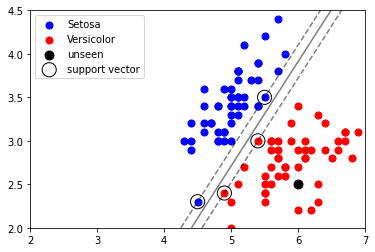

## Checking the results using Sklearn
###  12. Use sklearn.svm function to fit a model for the above classification task. 

For the SVM model parameters use ``C=1e5`` and ``kernel='linear'``.

In [ ]:
from sklearn.svm import SVC
# import some data to play with
y=y.ravel()

## Your code here
# 12.1 Define model
model = 
#12.2 Fit model to the data 


## End your code

#### Run cell below to plot the model results.

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='black', label = 'support vector');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.legend(loc = 'lower right')
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

plot_svc_decision_function(model)
plt.show()